In [1]:
import os
import scanpy as sc
import seaborn as sns
sns.set_style("ticks")
sc.set_figure_params(dpi=100, dpi_save=1000, vector_friendly=True)
import matplotlib

/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing read_loom from `anndata` is deprecated. Import anndata.io.read_loom instead.
  warnings.warn(msg, FutureWarning)
/home/robin/xenium-cgn/xenium_cgn/lib/python3.11/site-packages/anndata/utils.py:434: FutureWarning: Importing 

In [2]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

In [3]:
data = sc.read("/data/projects/robin/segmentation/xenium_outs/adata_polygon_reduced_pseudotime_X26updated_with_quadrants_with_clusters.h5ad")

In [4]:
data.obs["Condition"] = data.obs["Disease"].replace({"Cntrl": "Control",
                                                     "GBM": "aGBM"})

In [5]:
import numpy as np
import seaborn as sns

In [6]:
data.obs["KMeans_cluster"].cat.categories

Index(['C1', 'C2', 'C3', 'C4'], dtype='object')

In [7]:
data.obs["KMeans_cluster"].value_counts()

KMeans_cluster
C2    220
C3    210
C1    194
C4    158
Name: count, dtype: int64

In [14]:
data.uns["KMeans_cluster_colors"] = list(sns.color_palette("colorblind", 4).as_hex())

In [7]:
pc1_var = round(float(data.uns["pca"]["variance_ratio"][0]),2)
pc2_var = round(float(data.uns["pca"]["variance_ratio"][1]),2)

In [8]:
xlabel = f"PC1 (variance ratio = {pc1_var})"
ylabel = f"PC2 (variance ratio = {pc2_var})"

In [9]:
data.uns["Condition_colors"] = ['#1a6e9d', '#dbaed1', '#148b6b', '#ba621b']
# ["#0173b2", "#029e73", "#de8f05", "#d55e00"]

In [19]:
d = dict(zip(data.obs["KMeans_cluster"].cat.categories, data.uns["KMeans_cluster_colors"]))

In [28]:
s = ""
for key in d:
    s = s + key + ": " + d[key] + ", "
s

'C1: #0173b2, C2: #de8f05, C3: #029e73, C4: #d55e00, '

In [17]:
data.uns["KMeans_cluster_colors"]

['#0173b2', '#de8f05', '#029e73', '#d55e00']

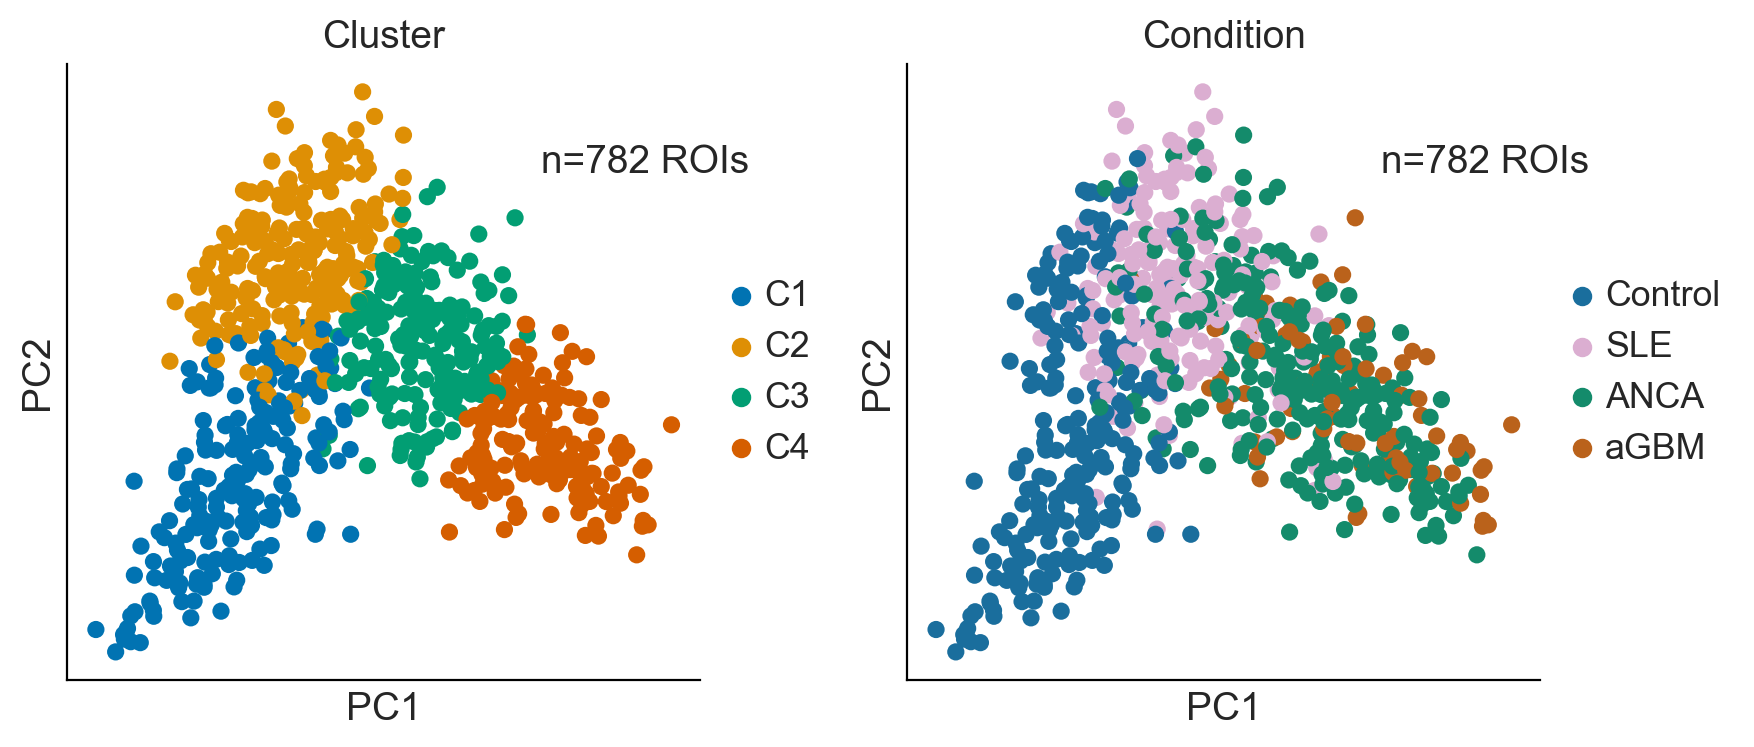

In [15]:
axes=sc.pl.pca(data, color=["KMeans_cluster", "Condition"], 
               show=False, title=["Cluster", "Condition"])
for ax in axes:
    # ax.set_xlabel(xlabel)
    # ax.set_ylabel(ylabel)
    ax.text(1,1,f"n={data.shape[0]} ROIs")
plt.savefig("Fig3A.pdf", bbox_inches="tight")

In [12]:
data.obs["PC1"] = data.obsm["X_pca"][:,0]
data.obs["PC2"] = data.obsm["X_pca"][:,2]

In [13]:
sns.set(style="ticks")
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

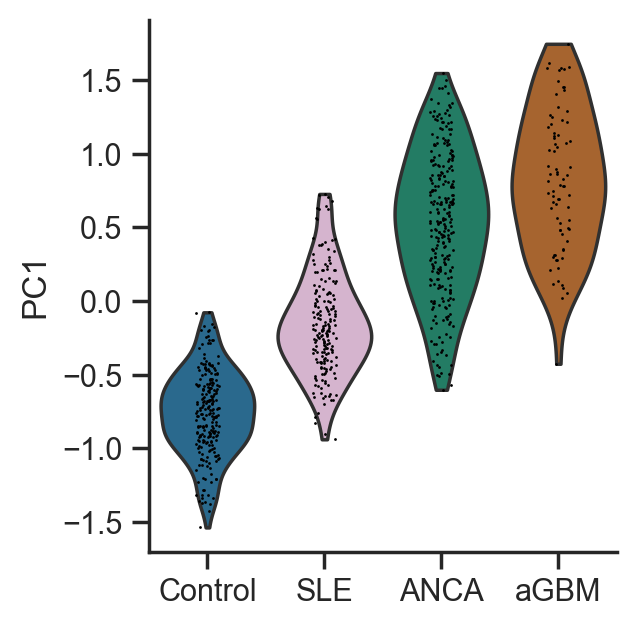

In [14]:
plt.figure(figsize=(3,3.5))
ax=plt.subplot(111)
sc.pl.violin(data, keys=["PC1"], groupby="Condition", show=False, ax=ax)
plt.xlabel("")
plt.savefig("Fig2B.pdf", bbox_inches="tight")